# **Predicting heart disease using machine learning**
This notebook looks into using varioius python-based machine learning and data science libraries in an attempt to build a machine learning
model capable of predicting whether or not someone has heart disease based on their medical attributes.

Method:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement:
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
Origninal data came from Cleavland data from the UCI Machine Learning Repository.

There is also a version available from Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue
the project.

## 4. Features
This is where you will get information about the features in your data

**Create data dictionary**

## Preparing the tools

We're going to use Pandas, Matplotlib and NumPy for data anlysis and manipulation

In [2]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want plots to appear inside notebook
%matplotlib inline 

# Models from Scikit-Learn
# https://scikit-learn.org/stable/machine_learning_map.html
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## **Load Data**

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## **Data Exploration (EDA)**

The goal here is to find out more on the data and become a subject matter expert on the dataset you are working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about it?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Calculate how much of each class we have
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

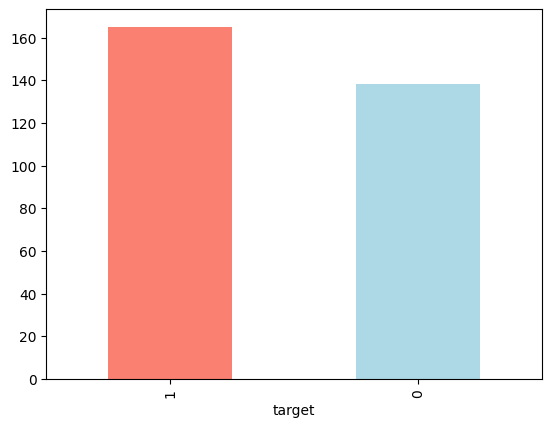

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to SEX

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with SEX column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


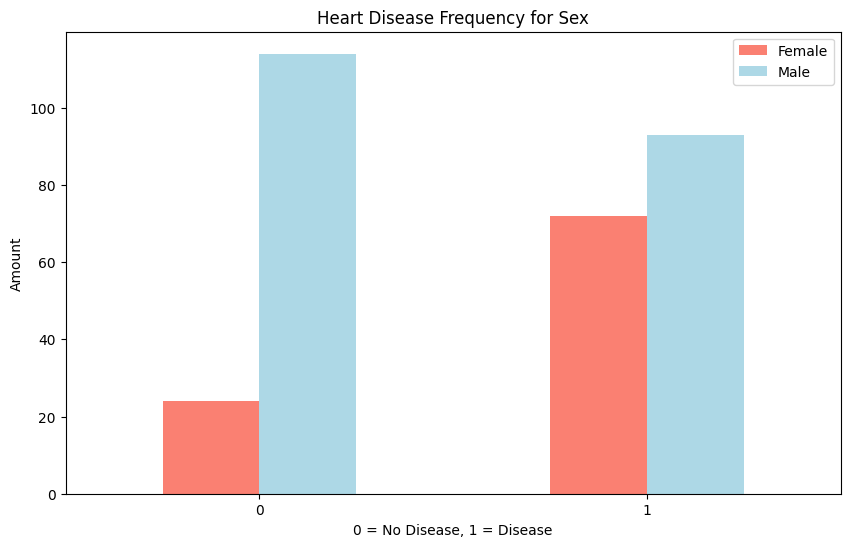

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

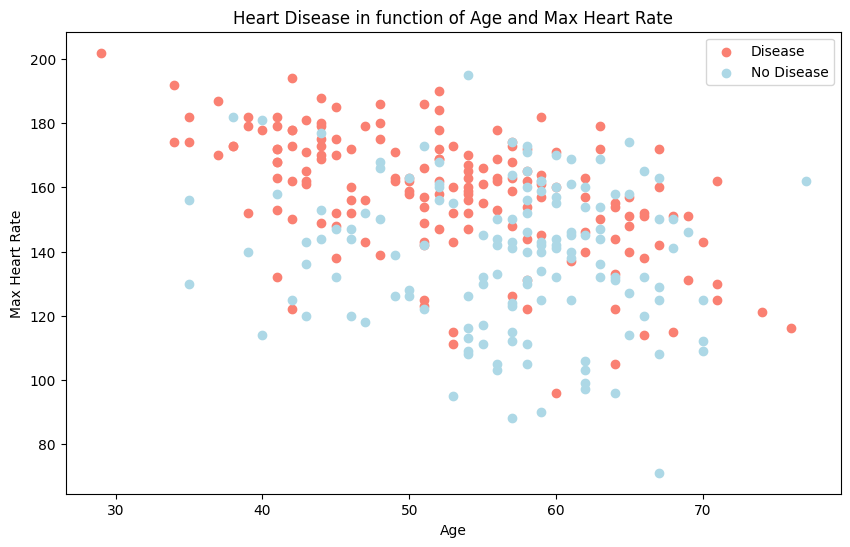

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

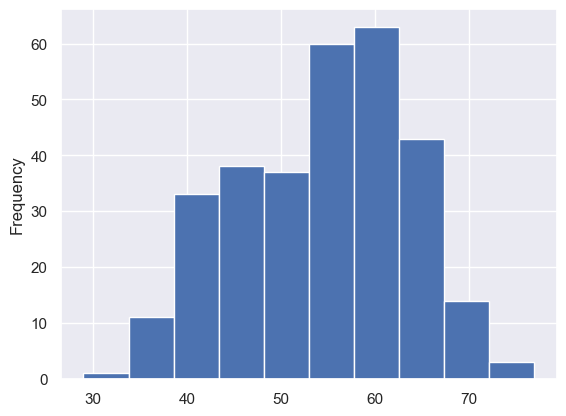

In [116]:
# Check the distribution of the age column with a histogram
# Can possibly find outliers from this
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


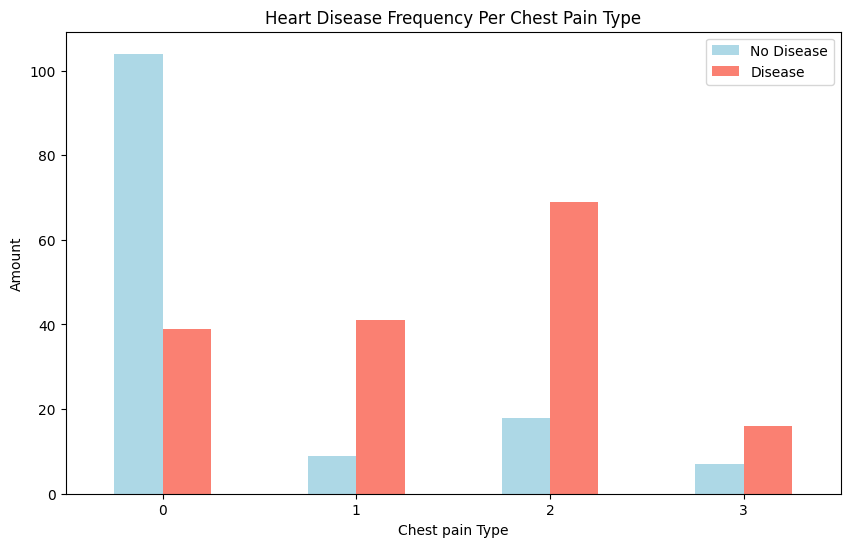

In [17]:
# Make the crosstab mroe visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


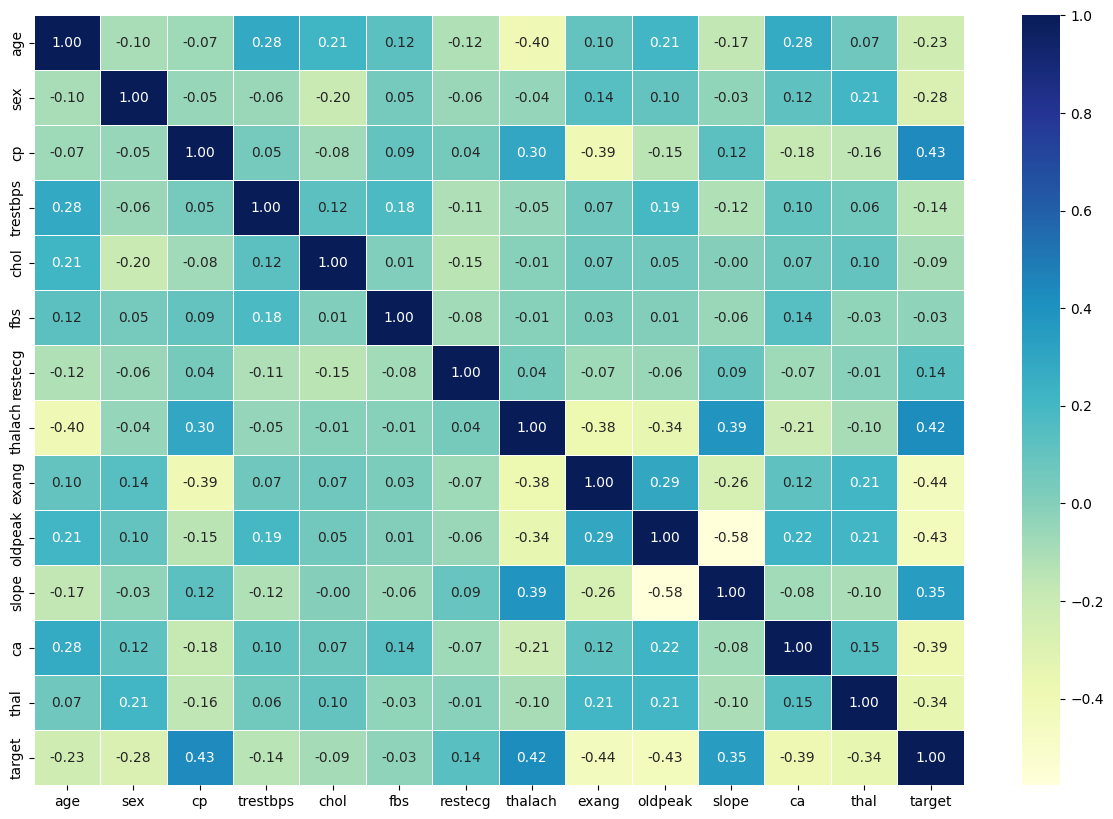

In [20]:
# Let's make correlation matrix more readable
# Higher positive value : potential correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## **Modelling**

In [21]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [22]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
# Split data into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Now data is split into traiing and test sets. Time to build a machine learning model.

We will train it on the training set.

And we will test it on the test set.

Trial of 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [24]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## **Compare Models**

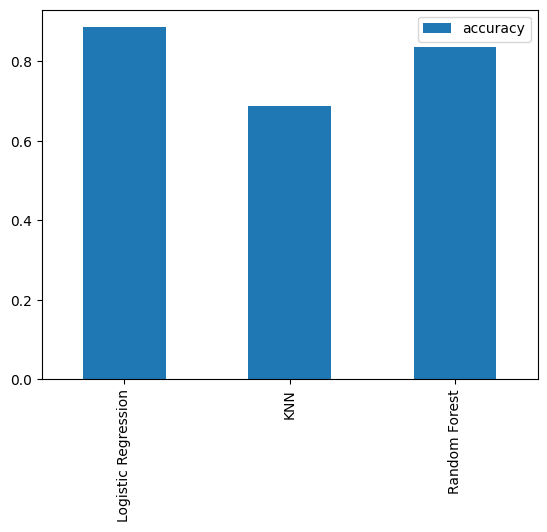

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## **Tuning and Improving our Model**

Now we have a baseline model and we know a first prediction is not what we should base our steps off. We should now tune and improve our model

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [27]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


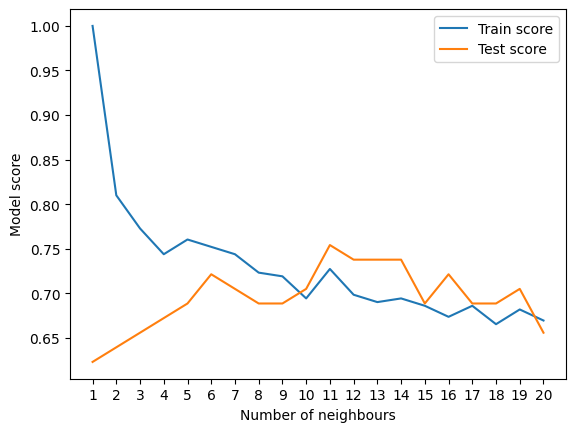

In [28]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## **Hyperparamter Tuning with RandomizedSearchCV**

We're going to tune:
* LogisiticRegression()
* RandomForestClassifier()
  
... using RandomizedSearchCV

In [34]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparamter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparamters grids setup for eahc of our models, let's tune them using RandomizedSearchCV()

In [32]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20, #randomly sample n_iter different sets of hyperparameters.
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression, let's do the same for RandomForestClassifier()

In [35]:
# Tune RandomForestClassifier()
np.random.seed(42)

# Setup random hyperparamter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# Fir random hyperparamter search for RandomForestClassifier
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## **Hyperparamter Tuning with GridSearchCV**

Since our LogisticRegression model provides the best scores so far, we're going to tune:
* LogisiticRegression()

using GridSearchVV()

In [38]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter searhc model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## **Evaluating our tuned machine learning classifier, beyond accuracy**

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [40]:
y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC Curve and AUC metric

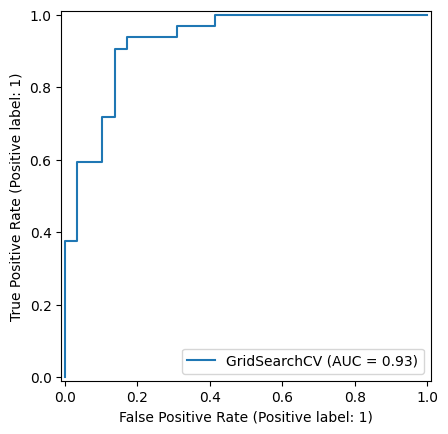

In [46]:
# Plot ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

### Confusion Matrix

In [47]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


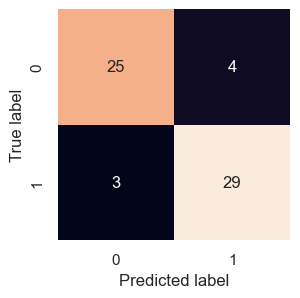

In [55]:
sns.set(font_scale=1)

def plot_conf_mat(y_test, y_preds):
    """
    Plot confusion matrix using seaborn heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

### Classification Report

Now we've got a ROC curve an AUC metric and a confusion matrix, let's get a classification report, as well as cross-validated precision, recall and f1-score

In [57]:
# This is calculated using only 1 test split
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Precision**: metric to determine how many of the predicted positives are actually positive (true positives), if our model returns 0 false positives, precision will be 1.0
**Recall**: metric to determine how many actual positives are recorded (true positive : (true positive + false negative), if our model returns 0 false negatives, recall will be 1.0
**f1-score**: combination score of precision and recall

### Calculating evaluation metrics using cross-validation

We're going to calculate precision, recall and f1 score of our model using cross-validation and to do so we will be using `cross_val_score`

In [58]:
# Check best hyper paramters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [59]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                         solver="liblinear")

In [87]:
# Function to calculate best scores using cross validation

metrics = {"Accuracy": 'accuracy',
          "Precision": 'precision',
          "Recall": 'recall',
          "F1-score": 'f1'}

def cv_best_score(metrics, clf, X, y, cv):
    np.random.seed(4)
    metric_scores = {}
    for name, scoring in metrics.items():
        scores = cross_val_score(clf,
                                 X,
                                 y,
                                 cv=cv,
                                 scoring=scoring)
        metric_scores[name] = np.mean(scores)
    return metric_scores

In [91]:
# Get each cross validated score
metrics_avg = cv_best_score(metrics=metrics,
                           clf=clf,
                           X=X,
                           y=y,
                           cv=5)
metrics_avg

{'Accuracy': np.float64(0.8446994535519124),
 'Precision': np.float64(0.8207936507936507),
 'Recall': np.float64(0.9212121212121213),
 'F1-score': np.float64(0.8673007976269721)}

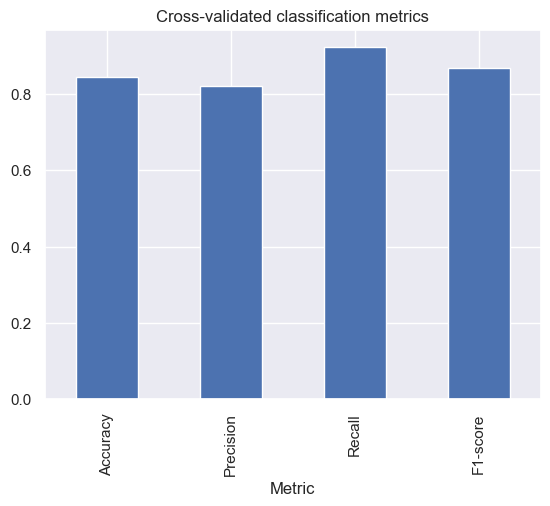

In [104]:
# Visualise our cross validated metrics
cv_metrics = pd.DataFrame.from_dict(metrics_avg, orient='index').reset_index()
cv_metrics.columns = ['Metric', 'Value']
cv_metrics.set_index("Metric").plot.bar(title="Cross-validated classification metrics",
                      legend = False);


## **Feature Importance**

Feature importance is another way of asking, "which features contributed most to the coutcomes of the model and how they contributed?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance"

Let's find the feature importance for our LogisticRegression model...

In [105]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(X_train, y_train);

In [110]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044608,  0.66067061, -0.01156993, -0.00166374,
         0.04386122,  0.3127581 ,  0.02459361, -0.60413054, -0.56862834,
         0.45051621, -0.63609876, -0.67663374]])

In [111]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.003167275089699386),
 'sex': np.float64(-0.8604460790279196),
 'cp': np.float64(0.6606706096352647),
 'trestbps': np.float64(-0.011569931632461184),
 'chol': np.float64(-0.0016637421222612918),
 'fbs': np.float64(0.04386121661621614),
 'restecg': np.float64(0.3127580999617399),
 'thalach': np.float64(0.024593609694095107),
 'exang': np.float64(-0.6041305389202294),
 'oldpeak': np.float64(-0.5686283368137661),
 'slope': np.float64(0.45051621167145023),
 'ca': np.float64(-0.6360987581158484),
 'thal': np.float64(-0.6766337397805393)}

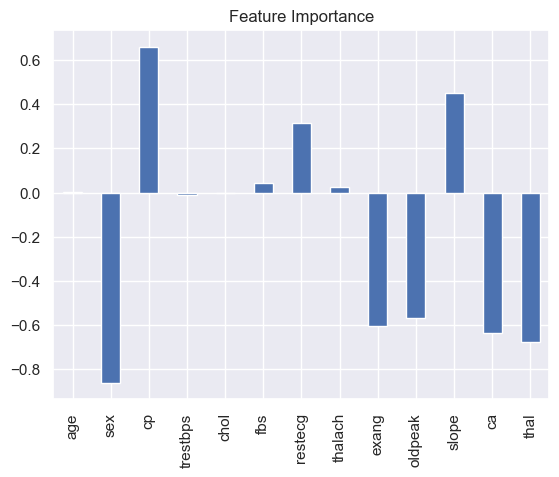

In [113]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## **Experimentation**

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?